In [11]:
import pandas as pd
data = pd.read_csv('train.csv')

In [5]:
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
data.head

<bound method NDFrame.head of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>

In [8]:
data.tweet[31960]

'@user #sikh #temple vandalised in in #calgary, #wso condemns  act  '

In [10]:
data.label[31960]
#1 indicates that this tweet is racist

1

Confusion Matrix :
 [[8912   25]
 [ 368  284]]

Classification Report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8937
           1       0.92      0.44      0.59       652

    accuracy                           0.96      9589
   macro avg       0.94      0.72      0.78      9589
weighted avg       0.96      0.96      0.95      9589


Accuracy : 0.9590155386380227 

HeatMap : 



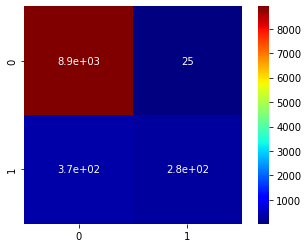

In [2]:
#import libraries
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
import seaborn
import matplotlib.pyplot as plt

#Taking data and splitting it
X, Y = data.tweet, data.label
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

#Transform the data into dtm matrix
CountVector = CountVectorizer()
xtrain = (CountVector.fit_transform(x_train)).toarray()
xtest = (CountVector.transform(x_test)).toarray()

#Define Model and train it
Model = MultinomialNB()
Model.fit(xtrain, y_train)
#Predict the results
predict = Model.predict(xtest)

#Print Metrics and Accuracy
cm = confusion_matrix(y_test, predict)
print('Confusion Matrix :\n' ,cm)
print('\nClassification Report :\n' ,classification_report(y_test, predict))
print('\nAccuracy :' ,accuracy_score(y_test, predict), '\n\nHeatMap : \n')

#Heatmap
seaborn.heatmap(cm, annot=True, square = True,  cmap = 'jet')
plt.show()

In [13]:
x_train

13018    meanwhile in socialist venezuela... they prote...
8603     if you think the answer is more guns, i really...
30709    come and get it!! #2008 #ford #mustang #usedca...
26490           so   and #tragic   #prayingfohefamily  :( 
16212    i swear i'm getting worst each day ðª #depre...
                               ...                        
7975     good morningððâï¸ðððð»   #...
7396     re-read my tweet oh yea good one.... has becom...
19131                           great run in at the end   
30286     @user   bihday @user ðððð you're ...
13629        #whenever im   and #something goes #wrong:   
Name: tweet, Length: 22373, dtype: object

x_test

In [12]:
xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
y_train

13018    0
8603     0
30709    0
26490    0
16212    0
        ..
7975     0
7396     0
19131    0
30286    0
13629    0
Name: label, Length: 22373, dtype: int64

In [19]:
xtest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
print(xtest.size)
print(xtest[0].size)

315516456
32904


In [23]:
print(xtrain.size)
print(xtrain[0].size)

736161192
32904


In [52]:
racist_data = data[data.label==1]

In [71]:
racist_data.tweet

13       @user #cnn calls #michigan middle school 'buil...
14       no comment!  in #australia   #opkillingbay #se...
17                                  retweet if you agree! 
23         @user @user lumpy says i am a . prove it lumpy.
34       it's unbelievable that in the 21st century we'...
                               ...                        
31934    lady banned from kentucky mall. @user  #jcpenn...
31946    @user omfg i'm offended! i'm a  mailbox and i'...
31947    @user @user you don't have the balls to hashta...
31948     makes you ask yourself, who am i? then am i a...
31960    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 2242, dtype: object

In [86]:
racist_data.tweet[14]

'no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins'

In [90]:
a=["#opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins"]
test1 = (CountVector.transform(a)).toarray()
print(Model.predict(test1)[0])

1
